In [1]:
import base64
import datetime
import json
import os
import random
import time

import scipy
from scipy import ndimage
import numpy as np
import pandas as pd
import sklearn
import matplotlib as mpl
import matplotlib.pyplot as plt
from pylab import rcParams
#import seaborn as sns
#import statsmodels as sm
from pylab import rcParams
from pylab import *
from matplotlib.dates import date2num , DateFormatter
from PIL import Image

np.random.seed(1337)

%matplotlib inline
#sns.set(font_scale=1.0)
#rcParams['figure.figsize'] = 8, 6
#sns.set_style('whitegrid')
#sns.set_palette(sns.color_palette('muted'))

/usr/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


# Pillow

### Open

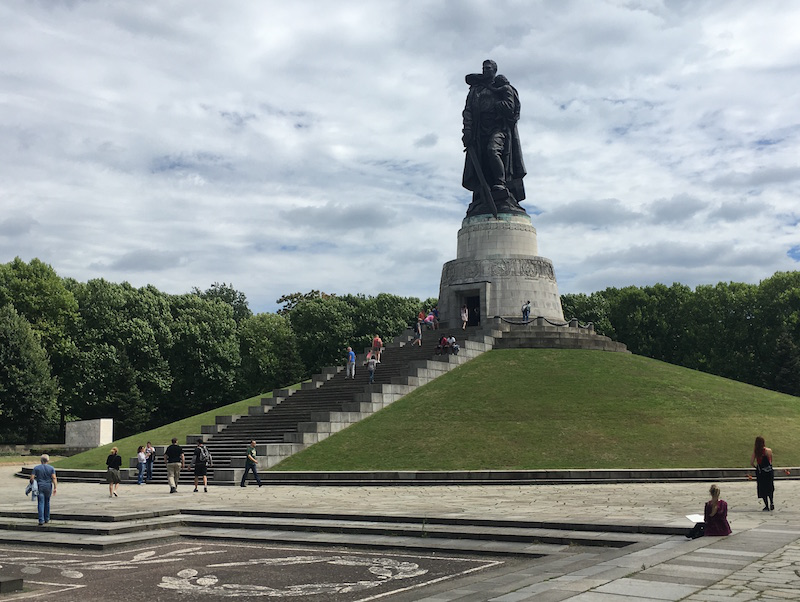

In [2]:
im = Image.open('img/treptow.jpg')
im

### Convert to Greyscale

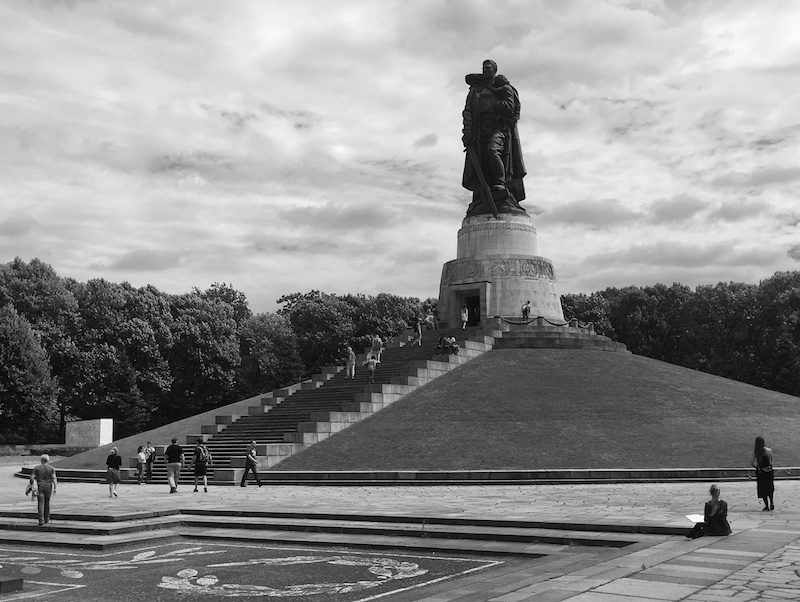

In [3]:
im.convert('L')

### Save

In [4]:
im.convert('L').save('img/treptow_bw.png')

### List Images in a Directory

In [5]:
[os.path.join('img/', f) for f in os.listdir('img/') if f.endswith('.jpg')]

['img/treptow.jpg']

### Create a Thumbnail

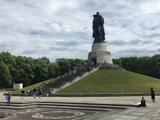

In [6]:
im.thumbnail((160, 120))
im

### Crop a Region

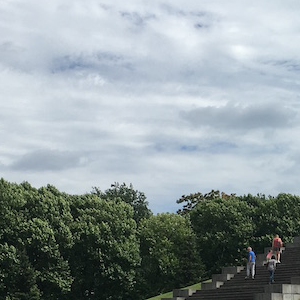

In [7]:
im = Image.open('img/treptow.jpg')
box = (100, 100, 400, 400)
region = im.crop(box)
region

### Copy and Paste a Region

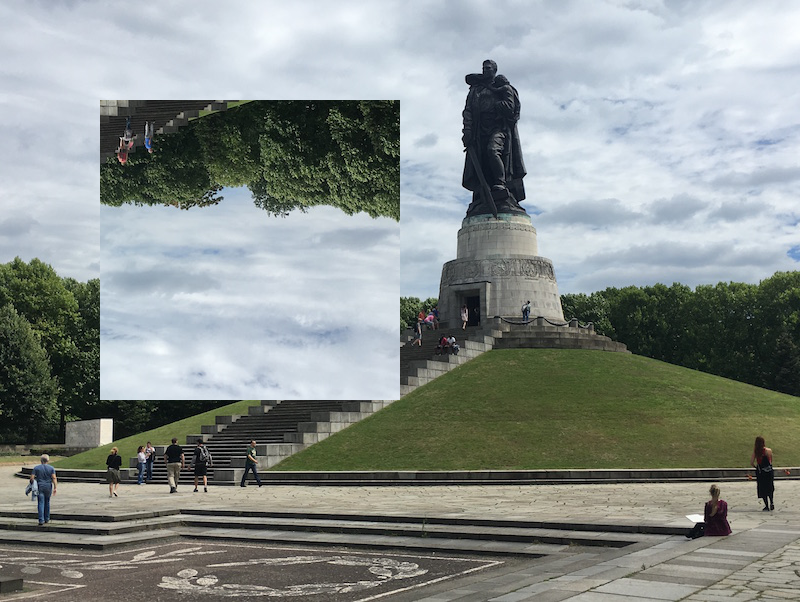

In [8]:
region = region.transpose(Image.ROTATE_180)
im.paste(region, box)
im

### Resize

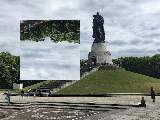

In [9]:
im.resize((160, 120))

### Rotate

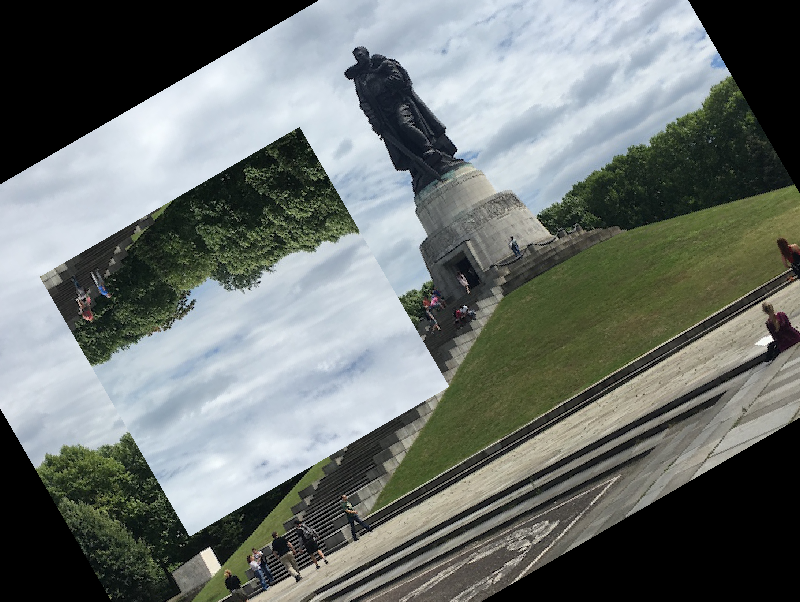

In [10]:
im.rotate(30)

# Matplotlib

### Add Markers

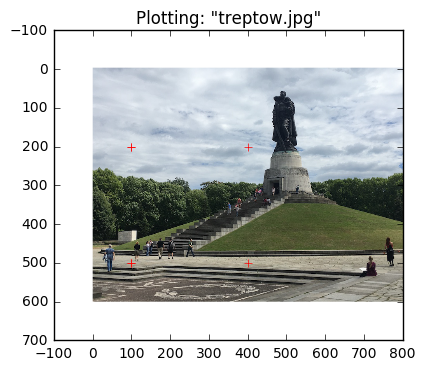

In [11]:
im = array(Image.open('img/treptow.jpg'))
imshow(im)

x = [100, 100, 400, 400]
y = [200, 500, 200, 500]

plot(x, y, 'r+')
plot(x[:2], y[:2], 'r+')

title('Plotting: "treptow.jpg"')

show()

### ISO Contours and Histogram

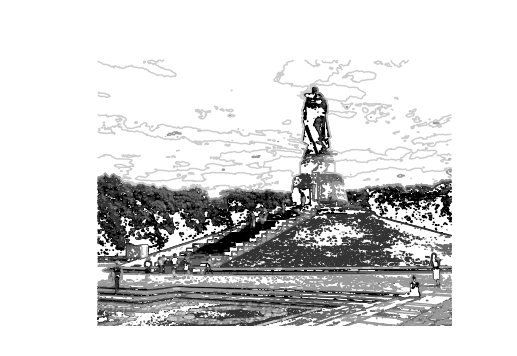

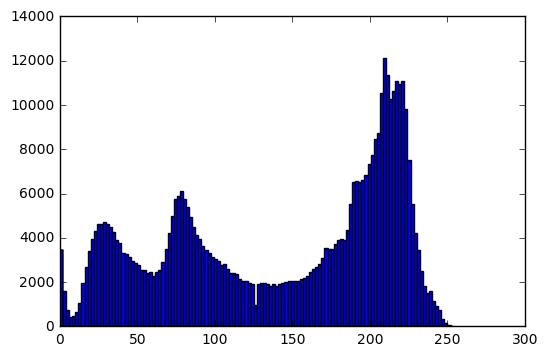

In [12]:
im = array(Image.open('img/treptow.jpg').convert('L'))

figure()
gray()
contour(im, origin='image')
axis('equal')
axis('off')

figure()
hist(im.flatten(), 128)

show()

# NumPy

### Dimensions

In [13]:
im = array(Image.open('img/treptow.jpg'))
print im.shape, im.dtype

(602, 800, 3) uint8


In [14]:
im = array(Image.open('img/treptow.jpg').convert('L'), 'f')
print im.shape, im.dtype

(602, 800) float32


### Values of Pixels and Changing Them

In [15]:
im[100, 100]

224.0

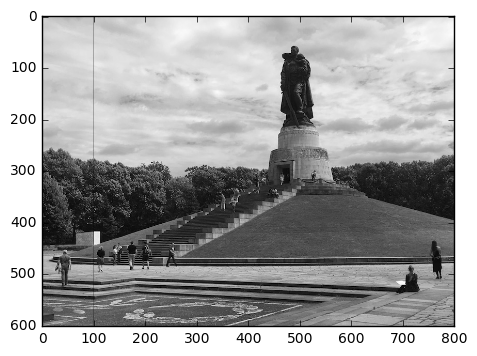

In [16]:
im[:, 100] = 0
imshow(im)

### Invert

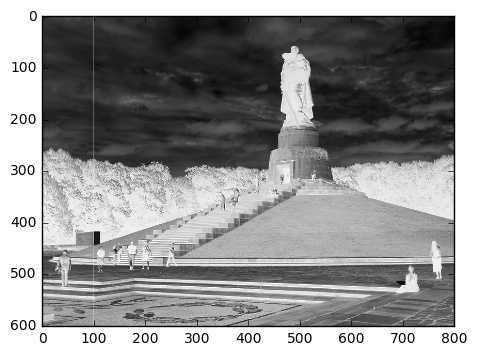

In [17]:
im2 = 255 - im
imshow(im2)

### Transform Values

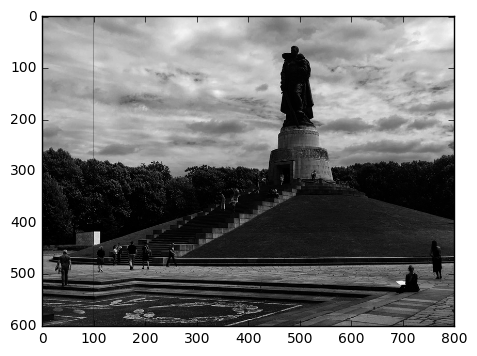

In [18]:
im3 = 255.0 * (im / 255.0)**2
imshow(im3)

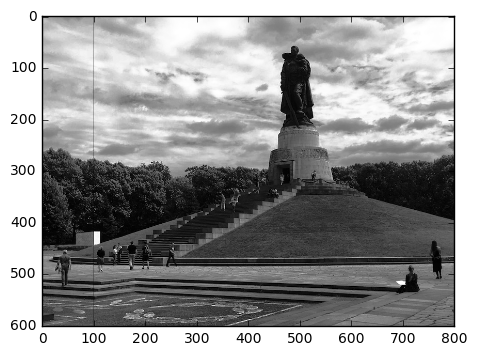

In [19]:
imhist, bins = histogram(im3.flatten(), 100, normed=True)
cdf = imhist.cumsum()
cdf = 255 * cdf / cdf[-1]
im5 = interp(im3.flatten(), bins[:-1], cdf)
imshow(im5.reshape(im3.shape))

### Resize

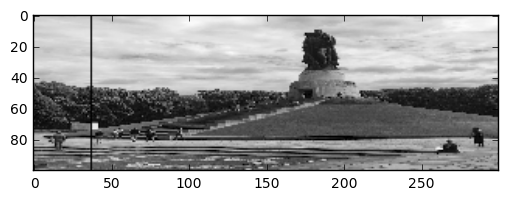

In [20]:
im4 = array(Image.fromarray(im).resize((300, 100)))
imshow(im4)

### PCA

In [21]:
def pca(X):
    """
    Principal Component Analysis
    input: X, matrix with training data stored as flattened arrays in rows
    return: projection matrix (with important dimensions first), variance and mean.
    """
    
    # get dimensions
    num_data,dim = X.shape
    
    # center data
    mean_X = X.mean(axis=0)
    X = X - mean_X
    
    if dim>num_data:

        # PCA - compact trick used
        M = dot(X,X.T)          # covariance matrix
        e,EV = linalg.eigh(M)   # eigenvalues and eigenvectors
        tmp = dot(X.T,EV).T     # this is the compact trick
        V = tmp[::-1]           # reverse since last eigenvectors are the ones we want S = sqrt(e)[::-1]
                                # reverse since eigenvalues are in increasing order
            
        for i in range(V.shape[1]): V[:,i] /= S
    else:
        # PCA - SVD used
        U,S,V = linalg.svd(X)
        V = V[:num_data]        # only makes sense to return the first num_data
                                # return the projection matrix, the variance and the mean
    return V,S,mean_X

In [22]:
imlist = [os.path.join('data/a_thumbs/', f) for f in os.listdir('data/a_thumbs/') if f.endswith('.jpg')]

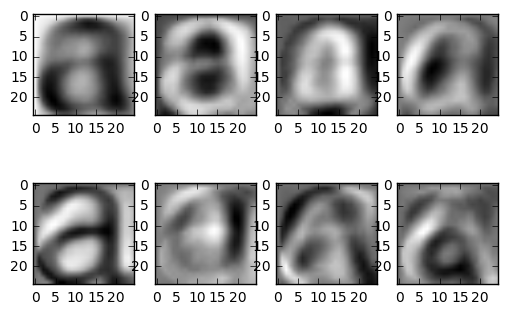

In [23]:
im = array(Image.open(imlist[0])) # open one image to get size
m,n = im.shape[0:2]               # get the size of the images
imnbr = len(imlist)               # get the number of images

# create matrix to store all flattened images
immatrix = array([array(Image.open(im)).flatten() for im in imlist],'f')

# perform PCA
V,S,immean = pca(immatrix)

# show some images (mean and 7 first modes)
figure()
gray()
subplot(2,4,1)
imshow(immean.reshape(m,n))

for i in range(7):
    subplot(2,4,i+2)
    imshow(V[i].reshape(m,n))

show()

# SciPy

### Blur

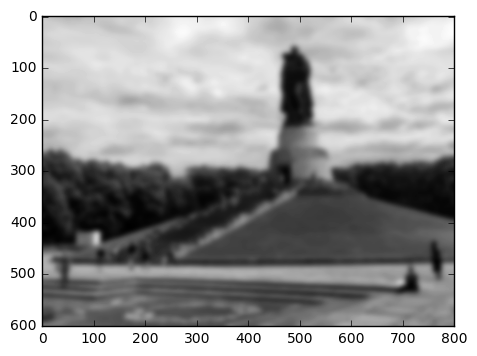

In [24]:
im = array(Image.open('img/treptow.jpg').convert('L'))
im2 = scipy.ndimage.filters.gaussian_filter(im,5)
imshow(im2)

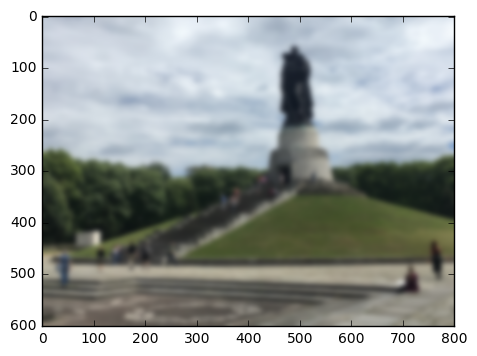

In [25]:
im = array(Image.open('img/treptow.jpg'))
im2 = zeros(im.shape)
for i in range(3):
    im2[:,:,i] = scipy.ndimage.filters.gaussian_filter(im[:,:,i],5)
im2 = uint8(im2)
imshow(im2)

### Image Derivatives

In [26]:
im = array(Image.open('img/treptow.jpg').convert('L'))

#Sobel derivative filters
imx = zeros(im.shape)
scipy.ndimage.filters.sobel(im,1,imx)

imy = zeros(im.shape)
scipy.ndimage.filters.sobel(im,0,imy)

magnitude = sqrt(imx**2+imy**2)

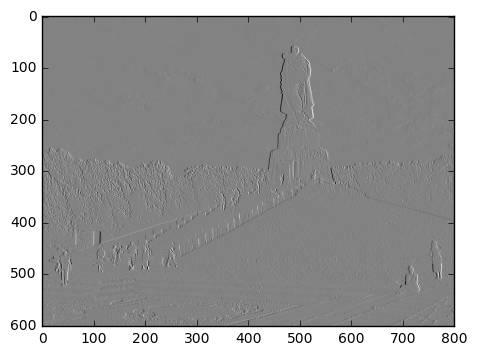

In [27]:
imshow(imx)

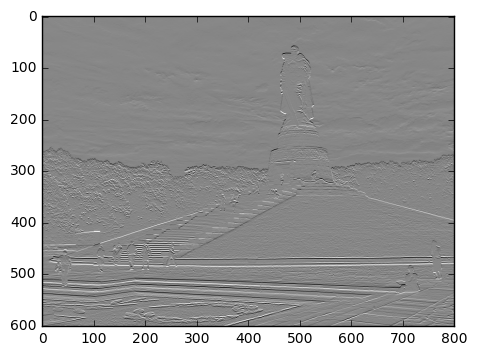

In [28]:
imshow(imy)

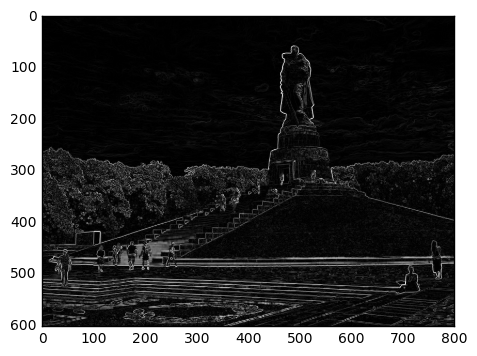

In [29]:
imshow(magnitude)

In [30]:
sigma = 5 #standard deviation

imx = zeros(im.shape)
scipy.ndimage.filters.gaussian_filter(im, (sigma,sigma), (0,1), imx)

imy = zeros(im.shape)
scipy.ndimage.filters.gaussian_filter(im, (sigma,sigma), (1,0), imy)

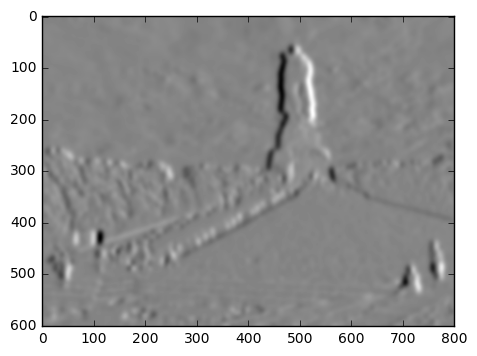

In [31]:
imshow(imx)

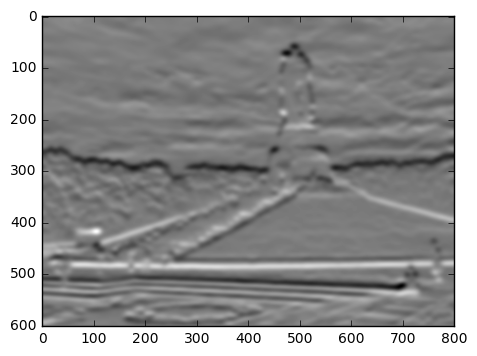

In [32]:
imshow(imy)

### Morphology

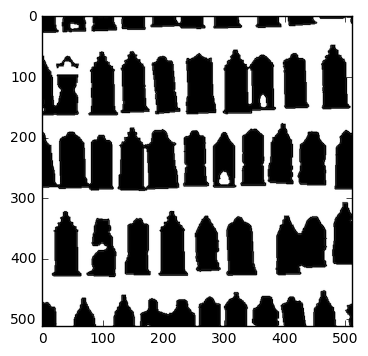

In [33]:
# load image and threshold to make sure it is binary
im = array(Image.open('data/houses.png').convert('L'))
imshow(im)

In [34]:
im = 1*(im<128)
labels, nbr_objects = scipy.ndimage.measurements.label(im)
print "Number of objects:", nbr_objects

Number of objects: 45


In [35]:
# morphology - opening to separate objects better
im_open = scipy.ndimage.morphology.binary_opening(im,ones((9,5)),iterations=2)

labels_open, nbr_objects_open = scipy.ndimage.measurements.label(im_open)
print "Number of objects:", nbr_objects_open

Number of objects: 48


### De-Noising

In [36]:
def denoise(im,U_init,tolerance=0.1,tau=0.125,tv_weight=100):
    """
    An implementation of the Rudin-Osher-Fatemi (ROF) denoising model
    using the numerical procedure presented in eq (11) A. Chambolle (2005).
    
    Input: noisy input image (grayscale), initial guess for U, weight of
    the TV-regularizing term, steplength, tolerance for stop criterion.
    
    Output: denoised and detextured image, texture residual.
    """

    m,n = im.shape #size of noisy image

    # initialize
    U = U_init
    Px = im # x-component to the dual field
    Py = im # y-component of the dual field
    error = 1
    
    while (error > tolerance):
        Uold = U
    
        # gradient of primal variable
        GradUx = roll(U,-1,axis=1)-U # x-component of U’s gradient
        GradUy = roll(U,-1,axis=0)-U # y-component of U’s gradient
        
        # update the dual varible
        PxNew = Px + (tau/tv_weight)*GradUx
        PyNew = Py + (tau/tv_weight)*GradUy
        NormNew = maximum(1,sqrt(PxNew**2+PyNew**2))
        
        Px = PxNew/NormNew # update of x-component (dual)
        Py = PyNew/NormNew # update of y-component (dual)
    
        # update the primal variable
        RxPx = roll(Px,1,axis=1) # right x-translation of x-component
        RyPy = roll(Py,1,axis=0) # right y-translation of y-component

        DivP = (Px-RxPx)+(Py-RyPy) # divergence of the dual field.
        U = im + tv_weight*DivP    # update of the primal variable
        
        # update of error
        error = linalg.norm(U-Uold)/sqrt(n*m)
    
    return U,im-U # denoised image and texture residual

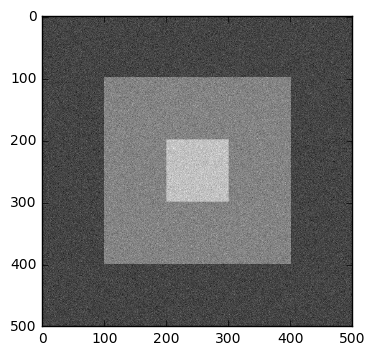

In [37]:
# create synthetic image with noise
im = zeros((500,500))
im[100:400,100:400] = 128
im[200:300,200:300] = 255
im = im + 30*np.random.standard_normal((500,500))

imshow(im)

In [38]:
U,T = denoise(im,im)
G = scipy.ndimage.filters.gaussian_filter(im,10)

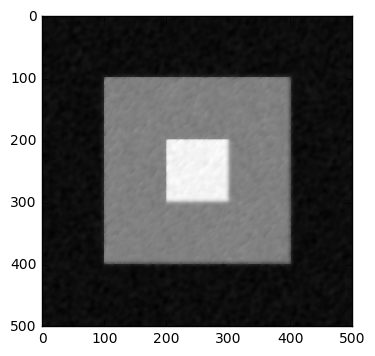

In [39]:
imshow(U)

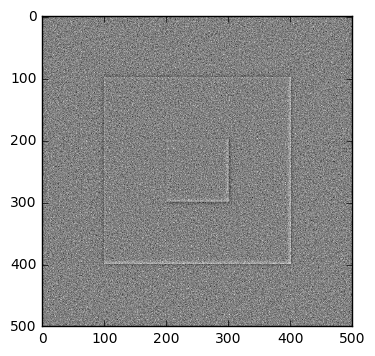

In [40]:
imshow(T)

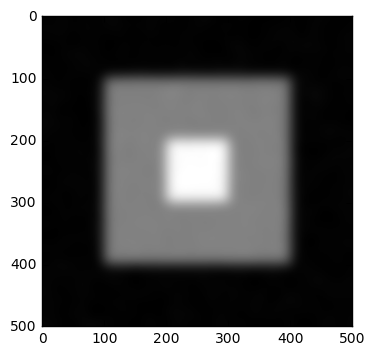

In [41]:
imshow(G)

# Exercises

### Plot Contours for Different Blur Sigmas

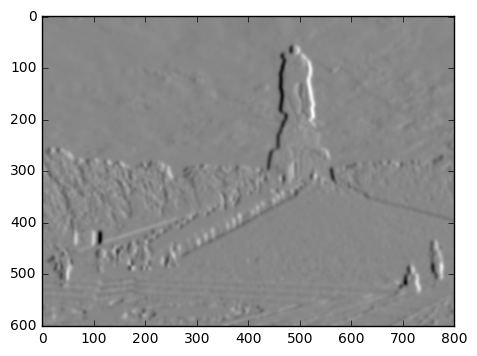

In [42]:
im = array(Image.open('img/treptow.jpg').convert('L'))
im = scipy.ndimage.filters.gaussian_filter(im,3)
imx = zeros(im.shape)
scipy.ndimage.filters.sobel(im,1,imx)
imshow(imx)

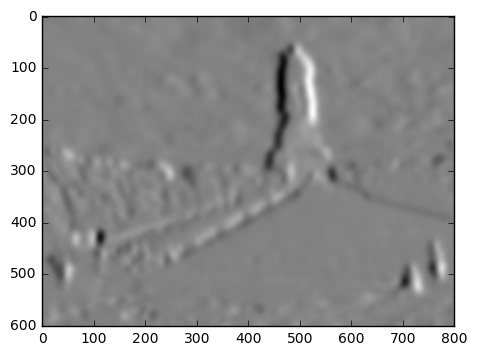

In [43]:
im = array(Image.open('img/treptow.jpg').convert('L'))
im = scipy.ndimage.filters.gaussian_filter(im,7)
imx = zeros(im.shape)
scipy.ndimage.filters.sobel(im,1,imx)
imshow(imx)

### Unsharp

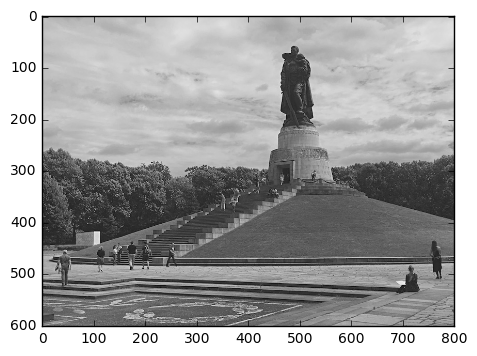

In [44]:
im = array(Image.open('img/treptow.jpg').convert('L'))
im2 = im + (255.0 - scipy.ndimage.filters.gaussian_filter(im, 3)) * 0.2

imshow(im2)

### Quotient Image

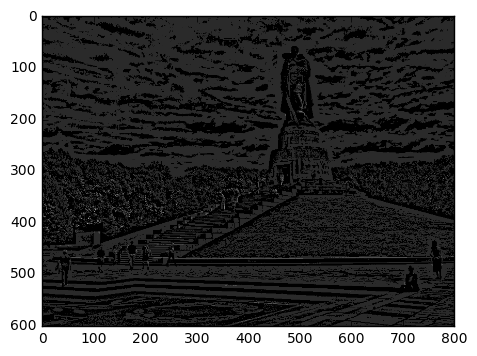

In [45]:
im = array(Image.open('img/treptow.jpg').convert('L'))
im2 = im / scipy.ndimage.filters.gaussian_filter(im, 5)

imshow(im2)

### Find Outlines

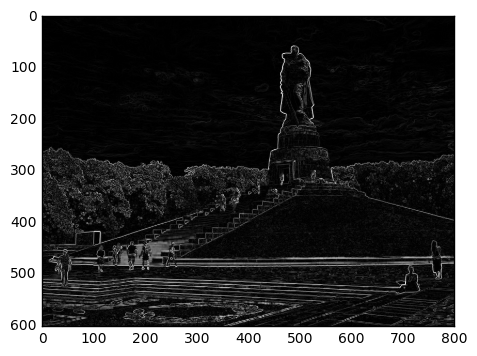

In [46]:
im = array(Image.open('img/treptow.jpg').convert('L'))

imx = zeros(im.shape)
scipy.ndimage.filters.sobel(im, 1, imx)

imy = zeros(im.shape)
scipy.ndimage.filters.sobel(im, 0, imy)

magnitude = sqrt(imx**2+imy**2)

imshow(magnitude)